# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [2]:
# Your work here.

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

## 1.Is the distribution of body temperatures normal?

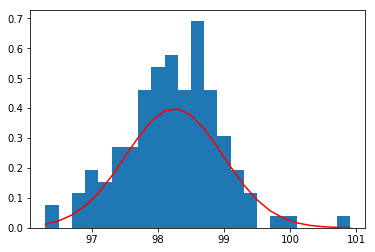

In [4]:
t = df.temperature
binwidth = 0.2
n, bins, patches = plt.hist(t, bins=np.arange(min(t), max(t) + binwidth, binwidth), normed=1)
mu = df.temperature.mean()
var = df.temperature.var()
sigma = np.sqrt(var)
plt.plot(bins, stats.norm.pdf((bins-mu)/sigma), color='r')

In [5]:
print "Sample mean is: ", df.temperature.mean()
print "Sample variance is: ", df.temperature.var()

Sample mean is:  98.2492307692
Sample variance is:  0.537557543232


We now test the null hypothesis that the distribution of human body temperature is normal.

Note that the population mean and variance are unknown, therefore we use the sample mean and sample variance as the estimates of population mean and population variance, respectively.

In [6]:
expected = (stats.norm.cdf((bins[1:]-mu)/sigma) - stats.norm.cdf((bins[:-1]-mu)/sigma))

In [7]:
chi = sum((n-expected)**2 / expected)
degrees = len(bins)-1

In [8]:
print chi, degrees

23.9109963023 23


In [9]:
stats.chisquare(n, expected)

Power_divergenceResult(statistic=23.910996302334823, pvalue=0.35191210615815044)

#### An alternative way to use the builtin `normaltest` in the scipy stats module.

In [10]:
stats.normaltest(df.temperature)

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

We could see that with the p-value of 0.26, we should accept the null hypothesis and convince that the human body temperature is normally distributed.

## 2. Is the sample size large? Are the observations independent?

In [11]:
print 'The sample size is: ', df.shape[0]

The sample size is:  130


#### Sample size:

In general, the central limit theorem (CLT) holds when the sample size is larger than 30. We have sample size of 130 here, hence we could consider the sample size large enough for the CLT to hold.

#### Observation independence:

Note that CLT requires samples to be drawn with replacement to keep the independence between samples. However, since the sample size is significantly smaller than the total population, we may safely assume that the observations are independent.

## 3. Is the true population mean really 98.6 degrees F?

We would use one sample test, since we are going to infer the mean of the entire population.

Note that the sample size = 130 > 30, therefore we should be able to use z-test (instead of t-test). In fact, with the degrees of freedom = 130 - 1 = 129, the t distribution would be similar to the normal distribution, hence the result would be similar.

The null hypothesis here is that the population mean equals 98.6 degrees F. That is,

$H_0: \mu = 98.6$ 

$H_1: \mu \neq 98.6$ 

Suppose the significance level is set as 5%.

In [12]:
mean = df.temperature.mean()
s = df.temperature.std()
n = len(df.temperature)
SE = s / np.sqrt(n)
print 'Std Error:', SE

Std Error: 0.0643044168379


Now, given the null hypothesis, we have $\mu = 98.6$, and the standard error SE$=0.0643$, we may now compute the z-score for the sample mean.

In [13]:
z = (mean - 98.6) / SE
print 'Z value is: ', z

Z value is:  -5.45482329236


We use a 2-sided test, and compute the p-value as

In [14]:
p = stats.norm.sf(abs(z))*2
print 'p-value is: ', p

p-value is:  4.90215701411e-08


Since the significance level is 5%, we could see that the p-value is far smaller than the significance level. Therefore, we should reject the null hypothesis, and declare that the population mean is not 98.6 degrees F.

#### Use t-test alternatively

In [15]:
stats.ttest_1samp(df.temperature, 98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

We could see that the p-value increases since t distribution has heavier tail distribution. However, with the set significance level of 5%, we would still reject the null hypothesis as the Z test above.

## 4. At what temperature should we consider someone's temperature to be "abnormal"?

We would start by computing the 95% confidence interval (CI). 

In [16]:
confidence = 0.95
confidence_z = 1 - (1-confidence)/2
ME = SE * stats.norm.ppf(confidence_z)
CI = (mean-ME, mean+ME)
print 'Confidence interval is ', CI

Confidence interval is  (98.123196428181657, 98.375265110279898)


We may consider someone's temperature to be abnormal if his/her body temperature is above 98.38 or below 98.12, with a confidence level of 95%.

## 5. Is there a significant difference between males and females in normal temperature?

We would use a 2 sample test to test if the mean male body temperature is identical to the mean female body temperature.

In particular, the null hypothesis is that the average male temperature is the same as the average female temperature. In other words, let $\mu_M$ and $\mu_F$ be the mean male and female body temperature, respectively, then the hypotheses are:

$H_0: \mu_M = \mu_F$

$H_1: \mu_M \neq \mu_F$

We assume the significance level to be $\alpha = 0.05$.

In [17]:
mean_male = df[df.gender == 'M'].temperature.mean()
var_male = df[df.gender == 'M'].temperature.var()
n_male = len(df[df.gender == 'M'].temperature)
mean_female = df[df.gender == 'F'].temperature.mean()
var_female = df[df.gender == 'F'].temperature.var()
n_female = len(df[df.gender == 'F'].temperature)
SE = np.sqrt(var_male/n_male + var_female/n_female)
print 'Standard error is: ', SE

Standard error is:  0.12655395042


In [18]:
z = (mean_male - mean_female - 0) / SE
print 'The z score is: ', z
p_value = stats.norm.sf(abs(z))*2
print 'The p-value is: ', p_value

The z score is:  -2.28543453817
The p-value is:  0.0222873607607


Since the significance level is $\alpha = 0.05$, we may reject the null hypothesis, and conclude that there is a significant difference in body temperature between male and female.